In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\NLPCourse\\spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


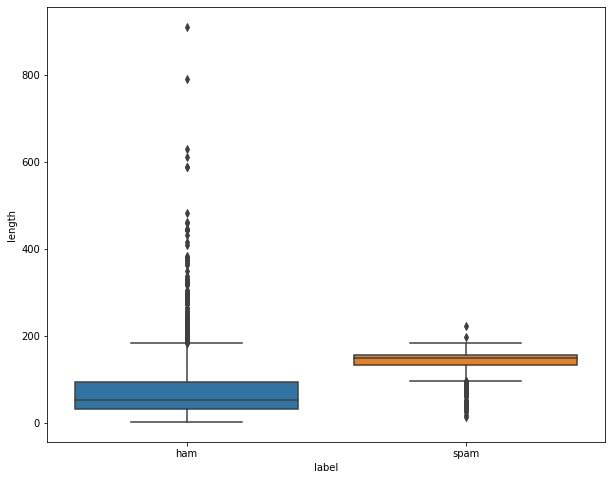

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(x='label', y='length', data=df)

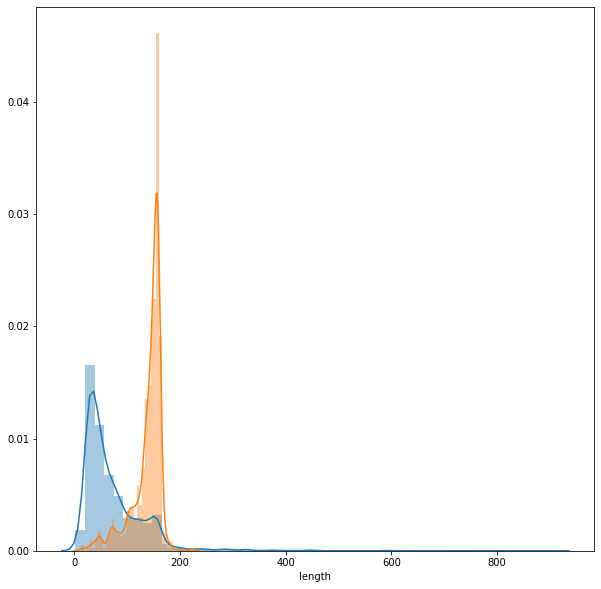

In [30]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['label'] =='ham']['length'])
sns.distplot(df[df['label'] =='spam']['length'])

In [23]:
q = df['length'].quantile(0.99)
data = df[df['length']<q]

In [24]:
data.shape, df.shape

((5516, 4), (5572, 4))

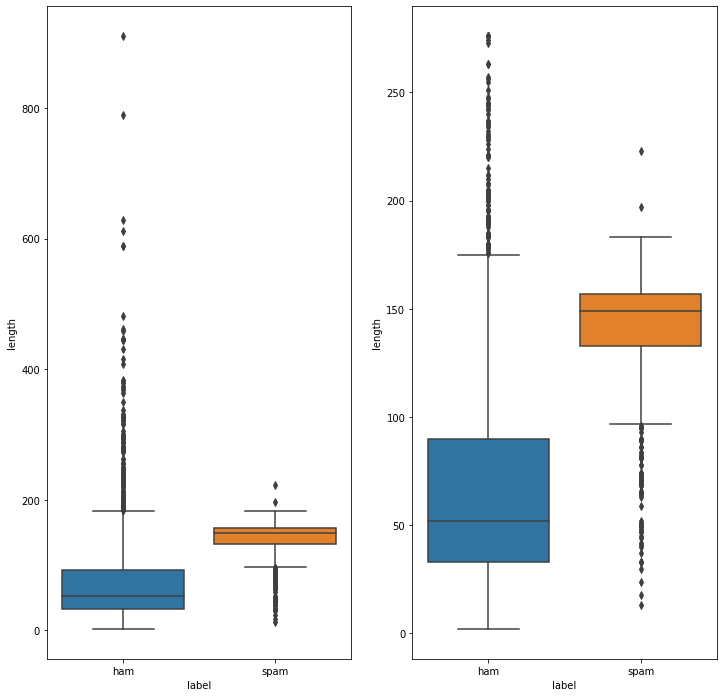

In [25]:
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
sns.boxplot(x='label', y='length', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='label', y='length', data=data)

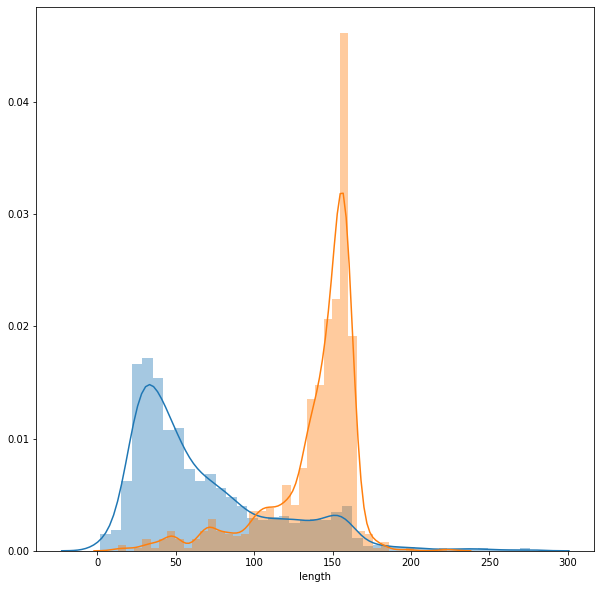

In [31]:
plt.figure(figsize=(10,10))
sns.distplot(data[data['label'] =='ham']['length'])
sns.distplot(data[data['label'] =='spam']['length'])

In [33]:
data['label'].value_counts()

ham     4769
spam     747
Name: label, dtype: int64

In [36]:
ham = data[data['label'] == 'ham']
spam = data[data['label'] == 'spam']

ham = ham.sample(spam.shape[0])


data = ham.append(spam,ignore_index=True)
data.shape

(1494, 4)

In [41]:
X= data['message']
y= data['label']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=34,shuffle=True)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators=100))])

In [85]:
classifier.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

# Support Vector Machine

In [77]:
from sklearn.svm import SVC
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SVC(C =120, gamma='auto'))])

In [78]:
classifier.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=120, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamm

# Test

In [86]:
y_pred = classifier.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy_score(y_test, y_pred)

0.9465478841870824

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.97      0.95       223
        spam       0.97      0.92      0.95       226

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



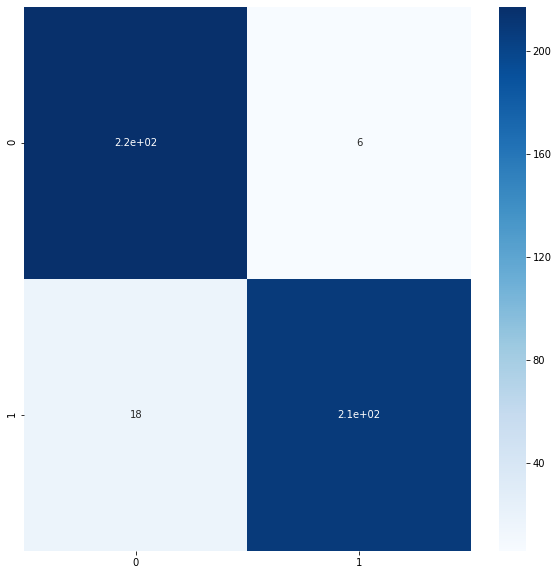

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True)

In [95]:
s1 = ['Hello, you have just created a spam filter model. Congratulations.'] 
s2 = ['Hope you are having fun. Good luck!']
s3 = ['Congratulations, you just won the competition and made over $2 billion! Call 03049505']

In [96]:
classifier.predict(s1)[0], classifier.predict(s2)[0], classifier.predict(s3)[0]

('ham', 'ham', 'spam')

In [99]:
s4 = ['For your information! You can call 35646788 to earn your income.']
classifier.predict(s4)[0]

'ham'